# 사용된 파일데이터 


- 한국수자원공사_가뭄대응정보_가뭄 피해정보_20220413.csv

- 기상청 지상(종관, ASOS) 일자료 조회서비스 OPEN API


한국수자원공사에서 제공하는 '가뭄대응정보_가뭄 피해정보'와 

기상청에서 제공하는 지상(종관, ASOS)를 가지고

각 지역 가뭄현상에서 날씨와 연관된 데이터들이 무엇인지 알아보고

어떠한 기후가 가뭄에 영향을 많이 가는지 알아본다.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

import matplotlib

import requests

font_location='c:/Windows/fonts/malgun.ttf'

font_name=font_manager.FontProperties(fname=font_location).get_name()

matplotlib.rc('font',family=font_name)


In [56]:
df=pd.read_csv("한국수자원공사_가뭄대응정보_가뭄 피해정보_20220413.csv",encoding='cp949')
df

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일
0,전라남도,완도군,청산면,제한급수,1200,2007-10-15,2008-04-21
1,전라남도,완도군,보길면,제한급수,1800,2007-12-10,2008-05-28
2,전라남도,완도군,노화읍,제한급수,1500,2007-12-10,2008-05-28
3,경상북도,의성군,사곡면,운반급수,88,2008-01-08,2008-04-08
4,전라남도,완도군,소안면,제한급수,2458,2008-02-12,2008-05-28
...,...,...,...,...,...,...,...
1629,강원도,태백시,삼수동,운반급수,2,2020-12-25,2020-12-27
1630,강원도,정선군,정선읍,운반급수,26,2020-12-27,2021-02-28
1631,강원도,춘천시,사북면,운반급수,84,2020-12-30,2021-03-10
1632,강원도,정선군,여량면,운반급수,50,2020-12-30,2021-02-25


In [66]:
df['피해시작일']=pd.to_datetime(df['피해시작일']) # datatime 으로 변경
df['피해종료일']=pd.to_datetime(df['피해종료일']) # datatime 으로 변경
df_days=pd.DataFrame(df['피해종료일']-df['피해시작일']) # 피해 기간 구하기
df_days=df_days.rename(columns={0:'피해기간'}) # 피해 기간 으로 칼럼명 변경
df=pd.read_csv("한국수자원공사_가뭄대응정보_가뭄 피해정보_20220413.csv",encoding='cp949') # 원래 df에
df=pd.concat([df,df_days],axis=1) #피해 기간 합치기
df["피해시작일"] = df["피해시작일"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df["피해종료일"] = df["피해종료일"].str.replace(pat=r'[^\w]', repl=r'', regex=True)

In [431]:
df

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일,피해기간
0,전라남도,완도군,청산면,제한급수,1200,20071015,20080421,189 days
1,전라남도,완도군,보길면,제한급수,1800,20071210,20080528,170 days
2,전라남도,완도군,노화읍,제한급수,1500,20071210,20080528,170 days
3,경상북도,의성군,사곡면,운반급수,88,20080108,20080408,91 days
4,전라남도,완도군,소안면,제한급수,2458,20080212,20080528,106 days
...,...,...,...,...,...,...,...,...
1629,강원도,태백시,삼수동,운반급수,2,20201225,20201227,2 days
1630,강원도,정선군,정선읍,운반급수,26,20201227,20210228,63 days
1631,강원도,춘천시,사북면,운반급수,84,20201230,20210310,70 days
1632,강원도,정선군,여량면,운반급수,50,20201230,20210225,57 days


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   시도      1634 non-null   object         
 1   시군구     1634 non-null   object         
 2   읍면동     1634 non-null   object         
 3   피해유형    1634 non-null   object         
 4   피해인구    1634 non-null   int64          
 5   피해시작일   1634 non-null   object         
 6   피해종료일   1567 non-null   object         
 7   피해기간    1567 non-null   timedelta64[ns]
dtypes: int64(1), object(6), timedelta64[ns](1)
memory usage: 102.2+ KB


In [68]:
df.columns

Index(['시도', '시군구', '읍면동', '피해유형', '피해인구', '피해시작일', '피해종료일', '피해기간'], dtype='object')

In [69]:
df['시도'].value_counts()

강원도        458
충청북도       244
경기도        221
경상북도       169
전라남도       136
충청남도       132
인천광역시      131
전라북도        96
경상남도        34
세종특별자치시      7
울산광역시        5
광주광역시        1
Name: 시도, dtype: int64

In [70]:
df['피해시작일'].value_counts()

2018-02-01    23
2015-06-17    23
2009-05-01    22
2017-06-22    19
2017-06-19    17
              ..
2016-05-20     1
2016-05-11     1
2016-05-04     1
2016-05-03     1
2020-12-31     1
Name: 피해시작일, Length: 744, dtype: int64

In [71]:
df[(df['피해시작일'][0]<df['피해시작일'])]

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일,피해기간
1,전라남도,완도군,보길면,제한급수,1800,2007-12-10,2008-05-28,170 days
2,전라남도,완도군,노화읍,제한급수,1500,2007-12-10,2008-05-28,170 days
3,경상북도,의성군,사곡면,운반급수,88,2008-01-08,2008-04-08,91 days
4,전라남도,완도군,소안면,제한급수,2458,2008-02-12,2008-05-28,106 days
5,전라남도,완도군,금일읍,제한급수,1200,2008-02-18,2008-05-26,98 days
...,...,...,...,...,...,...,...,...
1629,강원도,태백시,삼수동,운반급수,2,2020-12-25,2020-12-27,2 days
1630,강원도,정선군,정선읍,운반급수,26,2020-12-27,2021-02-28,63 days
1631,강원도,춘천시,사북면,운반급수,84,2020-12-30,2021-03-10,70 days
1632,강원도,정선군,여량면,운반급수,50,2020-12-30,2021-02-25,57 days


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   시도      1634 non-null   object         
 1   시군구     1634 non-null   object         
 2   읍면동     1634 non-null   object         
 3   피해유형    1634 non-null   object         
 4   피해인구    1634 non-null   int64          
 5   피해시작일   1634 non-null   object         
 6   피해종료일   1567 non-null   object         
 7   피해기간    1567 non-null   timedelta64[ns]
dtypes: int64(1), object(6), timedelta64[ns](1)
memory usage: 102.2+ KB


In [75]:
df['시도'].value_counts()

강원도        458
충청북도       244
경기도        221
경상북도       169
전라남도       136
충청남도       132
인천광역시      131
전라북도        96
경상남도        34
세종특별자치시      7
울산광역시        5
광주광역시        1
Name: 시도, dtype: int64

In [76]:
df[df['시도']=='강원도']['시군구'].value_counts()

화천군    60
원주시    56
삼척시    48
정선군    47
영월군    41
춘천시    40
횡성군    31
인제군    29
홍천군    28
태백시    27
평창군    20
속초시    16
강릉시     6
양구군     5
동해시     3
고성군     1
Name: 시군구, dtype: int64

In [77]:
df[df['시도']=='충청북도']['시군구'].value_counts()

충주시       145
제천시        29
단양군        29
괴산군        16
옥천군        10
영동군         8
청주시상당구      4
보은군         3
Name: 시군구, dtype: int64

In [78]:
df[df['시도']=='경기도']['시군구'].value_counts()

가평군       110
광주시        50
용인시처인구     14
안성시        11
양평군        10
화성시         9
하남시         4
이천시         4
오산시         4
여주시         2
용인시수지구      2
포천시         1
Name: 시군구, dtype: int64

In [79]:
df[df['시도']=='경상북도']['시군구'].value_counts()

안동시      55
의성군      40
울진군      24
봉화군      13
경주시       8
상주시       7
청송군       5
영덕군       4
예천군       4
영천시       4
영양군       3
포항시남구     1
문경시       1
Name: 시군구, dtype: int64

In [80]:
df[df['시도']=='전라남도']['시군구'].value_counts()

완도군    36
진도군    25
고흥군    20
신안군    16
보성군    15
여수시     9
화순군     6
강진군     4
장흥군     3
목포시     2
Name: 시군구, dtype: int64

In [81]:
df[df['시도']=='충청남도']['시군구'].value_counts()

부여군       41
천안시동남구    21
홍성군       15
보령시       12
천안시서북구    12
금산군        9
예산군        8
공주시        5
서산시        4
서천군        4
태안군        1
Name: 시군구, dtype: int64

In [82]:
df[df['시도']=='인천광역시']['시군구'].value_counts()

옹진군    86
강화군    33
중구     10
서구      2
Name: 시군구, dtype: int64

In [83]:
df[df['시도']=='전라북도']['시군구'].value_counts()

완주군       45
임실군       12
정읍시       10
전주시완산구     7
남원시        7
장수군        4
무주군        4
진안군        4
군산시        2
부안군        1
Name: 시군구, dtype: int64

In [84]:
df[df['시도']=='경상남도']['시군구'].value_counts()

양산시    9
의령군    6
남해군    6
산청군    4
함양군    3
통영시    2
합천군    2
밀양시    1
거제시    1
Name: 시군구, dtype: int64

In [85]:
df['시도'].sort_values().unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '세종특별자치시', '울산광역시', '인천광역시',
       '전라남도', '전라북도', '충청남도', '충청북도'], dtype=object)

In [86]:
df['시도'].unique() # 중복 없이

array(['전라남도', '경상북도', '강원도', '경상남도', '전라북도', '경기도', '울산광역시', '충청북도',
       '충청남도', '인천광역시', '세종특별자치시', '광주광역시'], dtype=object)

In [87]:
df.loc[:,'시도'].sort_values()

1633     강원도
825      강원도
826      강원도
362      강원도
361      강원도
        ... 
728     충청북도
735     충청북도
743     충청북도
817     충청북도
816     충청북도
Name: 시도, Length: 1634, dtype: object

In [88]:
df['시도'].value_counts().index

Index(['강원도', '충청북도', '경기도', '경상북도', '전라남도', '충청남도', '인천광역시', '전라북도', '경상남도',
       '세종특별자치시', '울산광역시', '광주광역시'],
      dtype='object')

In [89]:
df['시도'].value_counts()

강원도        458
충청북도       244
경기도        221
경상북도       169
전라남도       136
충청남도       132
인천광역시      131
전라북도        96
경상남도        34
세종특별자치시      7
울산광역시        5
광주광역시        1
Name: 시도, dtype: int64

In [90]:
df['시도'].unique()

array(['전라남도', '경상북도', '강원도', '경상남도', '전라북도', '경기도', '울산광역시', '충청북도',
       '충청남도', '인천광역시', '세종특별자치시', '광주광역시'], dtype=object)

In [91]:
df[df['시도']=='경기도']['피해인구'].max()

3000

In [92]:
df.groupby('시도')['피해인구'].sum()

시도
강원도        259849
경기도         26275
경상남도        27635
경상북도        15704
광주광역시         108
세종특별자치시       587
울산광역시         442
인천광역시       26053
전라남도       112826
전라북도        37693
충청남도         9806
충청북도        13313
Name: 피해인구, dtype: int64

In [93]:
df.groupby('시도')['피해인구'].max()

시도
강원도        25016
경기도         3000
경상남도       11631
경상북도        4018
광주광역시        108
세종특별자치시      150
울산광역시        243
인천광역시       2122
전라남도        4978
전라북도       13857
충청남도        1319
충청북도         759
Name: 피해인구, dtype: int64

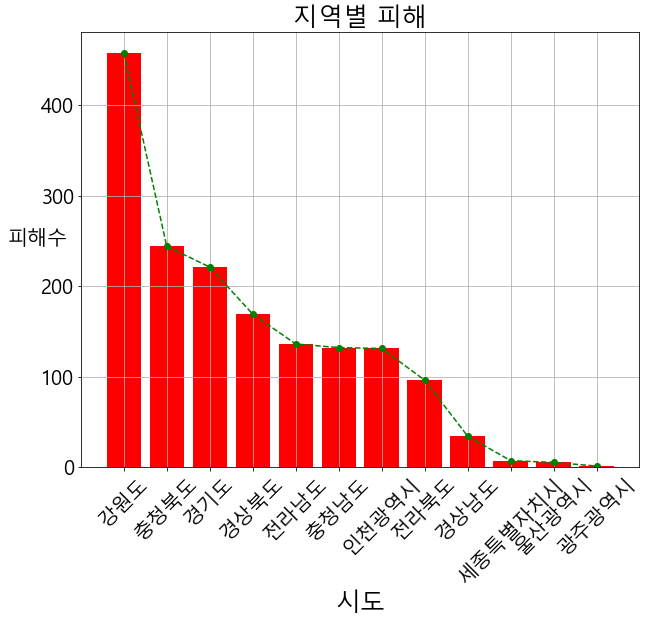

In [94]:
# 지역별 피해 그래프
plt.figure(figsize=(10,8))
plt.bar(df['시도'].value_counts().index,df['시도'].value_counts(),color='r')
plt.plot(df['시도'].value_counts().index,df['시도'].value_counts(),'go--')
plt.xlabel('시도',size=25)
plt.ylabel('피해수',size=20,rotation=0)
plt.title('지역별 피해',size=25)
plt.xticks(size=20,rotation=45)
plt.yticks(size=20)
plt.grid()
plt.show()

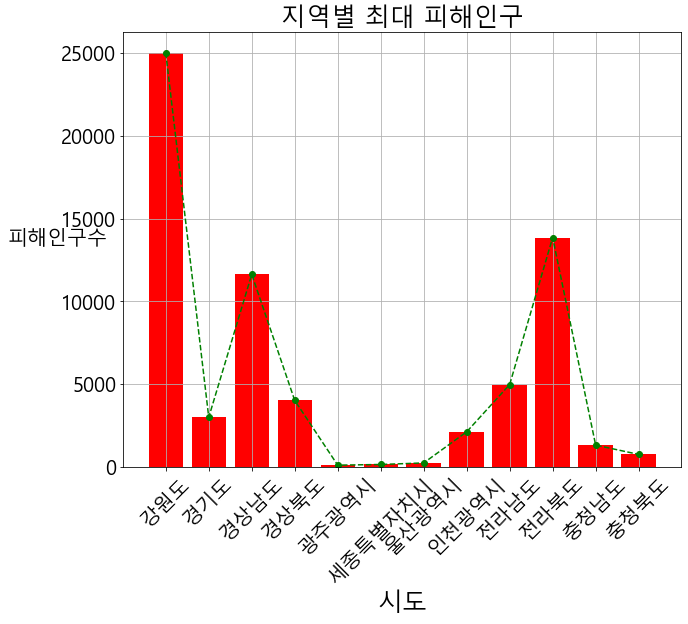

In [95]:
# 지역별 피해 인구수
plt.figure(figsize=(10,8))
plt.bar(df.groupby('시도')['피해인구'].max().index,df.groupby('시도')['피해인구'].max(),color='r')
plt.plot(df.groupby('시도')['피해인구'].max().index,df.groupby('시도')['피해인구'].max(),'go--')
plt.xlabel('시도',size=25)
plt.ylabel('피해인구수',size=20,rotation=0)
plt.title('지역별 최대 피해인구',size=25)
plt.xticks(size=20,rotation=45)
plt.yticks(size=20)
plt.grid()
plt.show()

In [221]:
df[df['시도']=='강원도']['피해시작일'].sort_values()

14      20090103
15      20090103
17      20090106
18      20090106
19      20090106
          ...   
1629    20201225
1630    20201227
1632    20201230
1631    20201230
1633    20201231
Name: 피해시작일, Length: 458, dtype: object

In [222]:
df[df['시도']=='강원도']['피해시작일'].value_counts()

20150617    17
20201117    10
20110117    10
20180206     9
20180130     8
            ..
20170608     1
20170613     1
20170618     1
20170620     1
20201231     1
Name: 피해시작일, Length: 239, dtype: int64

In [223]:
df[df['시도']=='충청북도']['피해시작일'].sort_values()

129     20120530
134     20120604
135     20120605
137     20120605
138     20120605
          ...   
1532    20200319
1535    20200326
1538    20200414
1541    20200428
1565    20200801
Name: 피해시작일, Length: 244, dtype: object

In [224]:
df[df['시도']=='충청북도']['피해시작일'].value_counts()

20170621    5
20170619    4
20170624    4
20170622    4
20150615    4
           ..
20170525    1
20170526    1
20170530    1
20170531    1
20200801    1
Name: 피해시작일, Length: 181, dtype: int64

In [226]:
df[(df['시도']=='충청북도') & (df['피해시작일']=='20170621')]

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일,피해기간
904,충청북도,충주시,대소원면,운반급수,90,20170621,20170621,0 days
908,충청북도,충주시,살미면,운반급수,25,20170621,20170621,0 days
913,충청북도,옥천군,안내면,운반급수,28,20170621,20170703,12 days
914,충청북도,단양군,대강면,운반급수,50,20170621,20170703,12 days
915,충청북도,단양군,가곡면,운반급수,90,20170621,20170703,12 days


In [227]:
df[(df['시도']=='충청북도')&(df['피해시작일'].str.contains('2017'))] # 1 5 6 12

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일,피해기간
679,충청북도,충주시,앙성면,운반급수,13,20170102,20170102,0 days
680,충청북도,충주시,앙성면,운반급수,13,20170102,20170102,0 days
683,충청북도,충주시,살미면,운반급수,30,20170104,20170104,0 days
684,충청북도,충주시,엄정면,운반급수,80,20170113,20170113,0 days
686,충청북도,충주시,소태면,운반급수,84,20170116,20170126,10 days
...,...,...,...,...,...,...,...,...
1041,충청북도,충주시,산척면,운반급수,79,20171220,20171220,0 days
1042,충청북도,충주시,교현·안림동,운반급수,55,20171221,20171221,0 days
1043,충청북도,충주시,노은면,운반급수,40,20171221,20171221,0 days
1044,충청북도,충주시,산척면,운반급수,79,20171222,20171222,0 days


In [325]:
df[(df['시도']=='충청북도')&(df['시군구']=='충주시')]['피해시작일']

154     20120620
156     20120621
164     20120622
262     20140716
263     20140716
          ...   
1532    20200319
1535    20200326
1538    20200414
1541    20200428
1565    20200801
Name: 피해시작일, Length: 145, dtype: object

In [326]:
chung_list = []

In [327]:
chung_list = df[(df['시도']=='충청북도')&(df['시군구']=='충주시')]['피해시작일']

In [328]:
chung_list

154     20120620
156     20120621
164     20120622
262     20140716
263     20140716
          ...   
1532    20200319
1535    20200326
1538    20200414
1541    20200428
1565    20200801
Name: 피해시작일, Length: 145, dtype: object

In [297]:
type(chung_list)

pandas.core.series.Series

In [99]:
df[(df['시도']=='강원도') & (df['피해시작일']=='2015-06-17')]

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일,피해기간
426,강원도,속초시,동명동,제한급수,3691,2015-06-17,2015-06-26,9 days
427,강원도,속초시,조양동,제한급수,23996,2015-06-17,2015-06-26,9 days
430,강원도,속초시,노학동,제한급수,23541,2015-06-17,2015-06-26,9 days
433,강원도,속초시,영랑동,제한급수,5336,2015-06-17,2015-06-26,9 days
434,강원도,속초시,금호동,제한급수,7417,2015-06-17,2015-06-26,9 days
435,강원도,속초시,교동,제한급수,11161,2015-06-17,2015-06-26,9 days
436,강원도,속초시,청호동,제한급수,3941,2015-06-17,2015-06-26,9 days
437,강원도,속초시,대포동,제한급수,3382,2015-06-17,2015-06-26,9 days
439,강원도,정선군,임계면,운반급수,67,2015-06-17,2015-06-26,9 days
440,강원도,인제군,인제읍,운반급수,53,2015-06-17,2015-06-26,9 days


In [100]:
df[(df['시도']=='강원도')&(df['피해기간']=='0 days')]['피해시작일'].value_counts()

2020-11-17    10
2018-01-30     8
2018-02-01     6
2018-01-01     5
2018-01-13     4
              ..
2018-01-19     1
2018-01-18     1
2018-01-15     1
2018-01-14     1
2020-12-24     1
Name: 피해시작일, Length: 101, dtype: int64

In [101]:
df[(df['시도']=='강원도')&(df['피해시작일'].str.contains('2018'))] #1 2 3 4 

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일,피해기간
1046,강원도,원주시,신림면,운반급수,50,2018-01-01,2018-01-15,14 days
1050,강원도,삼척시,하장면,운반급수,20,2018-01-01,2018-01-01,0 days
1051,강원도,정선군,남면,운반급수,32,2018-01-01,2018-01-01,0 days
1052,강원도,삼척시,하장면,운반급수,35,2018-01-01,2018-01-01,0 days
1053,강원도,삼척시,하장면,운반급수,41,2018-01-01,2018-01-01,0 days
...,...,...,...,...,...,...,...,...
1229,강원도,횡성군,갑천면,운반급수,0,2018-08-02,2018-08-06,4 days
1231,강원도,횡성군,공근면,운반급수,0,2018-08-02,2018-08-03,1 days
1233,강원도,횡성군,갑천면,운반급수,48,2018-08-03,2018-08-09,6 days
1234,강원도,횡성군,공근면,운반급수,170,2018-08-03,2018-08-21,18 days


In [102]:
df[df['피해시작일'].str.contains('2018')] # 포함된 문자열 검색

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일,피해기간
1046,강원도,원주시,신림면,운반급수,50,2018-01-01,2018-01-15,14 days
1047,인천광역시,옹진군,연평면,운반급수,2122,2018-01-01,2018-01-01,0 days
1048,경기도,가평군,청평면,운반급수,14,2018-01-01,2018-01-31,30 days
1049,경기도,가평군,청평면,운반급수,20,2018-01-01,2018-08-31,242 days
1050,강원도,삼척시,하장면,운반급수,20,2018-01-01,2018-01-01,0 days
...,...,...,...,...,...,...,...,...
1273,경상북도,안동시,남선면,운반급수,12,2018-11-11,2018-11-11,0 days
1274,충청남도,천안시동남구,북면,운반급수,20,2018-11-12,2018-11-12,0 days
1275,충청남도,천안시서북구,직산읍,운반급수,40,2018-11-18,2018-11-19,1 days
1276,충청남도,천안시동남구,북면,운반급수,50,2018-11-23,2018-11-23,0 days


### 강원도 _ 원주 (114) 날씨 데이터 

In [349]:
gangwon_list = []

In [350]:
gangwon_list = df[(df['시도']=='강원도')&(df['시군구']=='원주시')]['피해시작일']

In [353]:
gangwon_list

89      20110114
90      20110114
91      20110114
95      20110116
97      20110116
110     20110118
139     20120606
271     20140718
282     20140721
335     20150302
336     20150302
701     20170220
730     20170508
1046    20180101
1103    20180119
1112    20180127
1119    20180129
1451    20190708
1459    20190710
1464    20190723
1465    20190729
1466    20190730
1481    20190812
1484    20190828
1486    20190903
1487    20190903
1488    20190903
1491    20190909
1492    20190909
1499    20191025
1505    20191118
1512    20191212
1527    20200224
1528    20200227
1534    20200323
1546    20200601
1549    20200610
1550    20200610
1552    20200611
1560    20200626
1561    20200708
1566    20200804
1567    20200806
1569    20200814
1570    20200818
1572    20200825
1573    20200903
1574    20200910
1578    20200922
1579    20200928
1580    20200928
1581    20200929
1616    20201126
1622    20201204
1623    20201217
1625    20201224
Name: 피해시작일, dtype: object

In [354]:
# 원주의 데이터 
i = 0
result=[]
page = 1
start_point = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?dataCd=ASOS&dateCd=DAY&dataType=json'
serviceKey = '&serviceKey=zlEW34FgWyR2fAYpa583hKSDb5Z%2F1pH7szjeOwL99jnH9WuBSzAjqpP6vDS3KYd1kHDHkq9Bip46MVMYsQ3ZSA%3D%3D'
pageNo = '&pageNo='
numOfRows= '&numOfRows=10'
startDt = '&startDt='
endDt = '&endDt='
stnIds = '&stnIds=114'
url = start_point+serviceKey+pageNo+str(page)+numOfRows+startDt+gangwon_list.values[i]+endDt+gangwon_list.values[i]+stnIds
data=requests.get(url).json()

In [355]:
while (data['response']['header']['resultMsg']!='NO_DATA'):
    result=result+data['response']['body']['items']['item']
    page=page+1
    i=i+1
    if i > len(gangwon_list)-1 :
        break
    url = start_point+serviceKey+pageNo+str(page)+numOfRows+startDt+gangwon_list.values[i]+endDt+gangwon_list.values[i]+stnIds
    data=requests.get(url).json()
    
    

In [356]:
result

[{'stnId': '114',
  'stnNm': '원주',
  'tm': '2011-01-14',
  'avgTa': '-6.5',
  'minTa': '-11.9',
  'minTaHrmt': '0354',
  'maxTa': '-0.7',
  'maxTaHrmt': '1549',
  'mi10MaxRn': '',
  'mi10MaxRnHrmt': '',
  'hr1MaxRn': '',
  'hr1MaxRnHrmt': '',
  'sumRnDur': '5.67',
  'sumRn': '0.6',
  'maxInsWs': '4.5',
  'maxInsWsWd': '320',
  'maxInsWsHrmt': '2350',
  'maxWs': '2.7',
  'maxWsWd': '290',
  'maxWsHrmt': '2355',
  'avgWs': '0.6',
  'hr24SumRws': '505',
  'maxWd': '90',
  'avgTd': '-12.1',
  'minRhm': '49',
  'minRhmHrmt': '2346',
  'avgRhm': '64.8',
  'avgPv': '2.5',
  'avgPa': '1007.1',
  'maxPs': '1029.0',
  'maxPsHrmt': '0211',
  'minPs': '1024.3',
  'minPsHrmt': '1745',
  'avgPs': '1026.6',
  'ssDur': '9.9',
  'sumSsHr': '1.4',
  'hr1MaxIcsrHrmt': '1400',
  'hr1MaxIcsr': '0.78',
  'sumGsr': '4.17',
  'ddMefs': '0.9',
  'ddMefsHrmt': '1055',
  'ddMes': '0.9',
  'ddMesHrmt': '1055',
  'sumDpthFhsc': '0.9',
  'avgTca': '5.4',
  'avgLmac': '2.9',
  'avgTs': '-4.8',
  'minTg': '-14.2',
  

In [357]:
df_gangwon=pd.DataFrame(result)

In [358]:
df_gangwon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   stnId           56 non-null     object
 1   stnNm           56 non-null     object
 2   tm              56 non-null     object
 3   avgTa           56 non-null     object
 4   minTa           56 non-null     object
 5   minTaHrmt       56 non-null     object
 6   maxTa           56 non-null     object
 7   maxTaHrmt       56 non-null     object
 8   mi10MaxRn       56 non-null     object
 9   mi10MaxRnHrmt   56 non-null     object
 10  hr1MaxRn        56 non-null     object
 11  hr1MaxRnHrmt    56 non-null     object
 12  sumRnDur        56 non-null     object
 13  sumRn           56 non-null     object
 14  maxInsWs        56 non-null     object
 15  maxInsWsWd      56 non-null     object
 16  maxInsWsHrmt    56 non-null     object
 17  maxWs           56 non-null     object
 18  maxWsWd     

In [359]:
df_gangwon['tm']=pd.to_datetime(df_gangwon['tm']) # tm을 datetime으로 형 변환

In [362]:
gangwon_data=df_gangwon[['stnNm','tm','avgTa','minTa','maxTa','sumRn','avgTs']]
gangwon_data

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,원주,2011-01-14,-6.5,-11.9,-0.7,0.6,-4.8
1,원주,2011-01-14,-6.5,-11.9,-0.7,0.6,-4.8
2,원주,2011-01-14,-6.5,-11.9,-0.7,0.6,-4.8
3,원주,2011-01-16,-14.1,-17.9,-9.4,,-10.4
4,원주,2011-01-16,-14.1,-17.9,-9.4,,-10.4
5,원주,2011-01-18,-8.5,-15.9,-2.0,,-8.2
6,원주,2012-06-06,23.5,18.7,29.5,,30.4
7,원주,2014-07-18,26.0,21.7,31.8,2.5,28.9
8,원주,2014-07-21,28.2,24.1,33.5,,31.7
9,원주,2015-03-02,3.2,-3.7,9.8,,2.8


In [363]:
gangwon_data[gangwon_data['sumRn']=='']

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
3,원주,2011-01-16,-14.1,-17.9,-9.4,,-10.4
4,원주,2011-01-16,-14.1,-17.9,-9.4,,-10.4
5,원주,2011-01-18,-8.5,-15.9,-2.0,,-8.2
6,원주,2012-06-06,23.5,18.7,29.5,,30.4
8,원주,2014-07-21,28.2,24.1,33.5,,31.7
9,원주,2015-03-02,3.2,-3.7,9.8,,2.8
10,원주,2015-03-02,3.2,-3.7,9.8,,2.8
12,원주,2017-05-08,17.0,7.9,23.9,,21.2
13,원주,2018-01-01,-2.7,-8.0,2.9,,-2.2
14,원주,2018-01-19,0.9,-2.3,5.2,,-0.2


In [364]:
gangwon_data=gangwon_data.replace('','0') #  빈 값을 0으로 바꿈
gangwon_data

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,원주,2011-01-14,-6.5,-11.9,-0.7,0.6,-4.8
1,원주,2011-01-14,-6.5,-11.9,-0.7,0.6,-4.8
2,원주,2011-01-14,-6.5,-11.9,-0.7,0.6,-4.8
3,원주,2011-01-16,-14.1,-17.9,-9.4,0,-10.4
4,원주,2011-01-16,-14.1,-17.9,-9.4,0,-10.4
5,원주,2011-01-18,-8.5,-15.9,-2.0,0,-8.2
6,원주,2012-06-06,23.5,18.7,29.5,0,30.4
7,원주,2014-07-18,26.0,21.7,31.8,2.5,28.9
8,원주,2014-07-21,28.2,24.1,33.5,0,31.7
9,원주,2015-03-02,3.2,-3.7,9.8,0,2.8


In [365]:
gangwon_data[gangwon_data['sumRn']=='']

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs


In [366]:
gangwon_data.to_csv("강원도_원주_날씨.csv", index = False)

### 충북_충주시(127)날씨 데이터

In [329]:
df[(df['시도']=='충청북도')&(df['시군구']=='충주시')]['피해시작일']

154     20120620
156     20120621
164     20120622
262     20140716
263     20140716
          ...   
1532    20200319
1535    20200326
1538    20200414
1541    20200428
1565    20200801
Name: 피해시작일, Length: 145, dtype: object

In [330]:
chung_list = []

In [331]:
chung_list = df[(df['시도']=='충청북도')&(df['시군구']=='충주시')]['피해시작일']

In [332]:
chung_list

154     20120620
156     20120621
164     20120622
262     20140716
263     20140716
          ...   
1532    20200319
1535    20200326
1538    20200414
1541    20200428
1565    20200801
Name: 피해시작일, Length: 145, dtype: object

In [337]:
# 충주의 데이터 
i = 0
result=[]
page = 1
start_point = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?dataCd=ASOS&dateCd=DAY&dataType=json'
serviceKey = '&serviceKey=zlEW34FgWyR2fAYpa583hKSDb5Z%2F1pH7szjeOwL99jnH9WuBSzAjqpP6vDS3KYd1kHDHkq9Bip46MVMYsQ3ZSA%3D%3D'
pageNo = '&pageNo='
numOfRows= '&numOfRows=10'
startDt = '&startDt='
endDt = '&endDt='
stnIds = '&stnIds=127'
url = start_point+serviceKey+pageNo+str(page)+numOfRows+startDt+chung_list.values[i]+endDt+chung_list.values[i]+stnIds
data=requests.get(url).json()

In [338]:
url

'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?dataCd=ASOS&dateCd=DAY&dataType=json&serviceKey=zlEW34FgWyR2fAYpa583hKSDb5Z%2F1pH7szjeOwL99jnH9WuBSzAjqpP6vDS3KYd1kHDHkq9Bip46MVMYsQ3ZSA%3D%3D&pageNo=1&numOfRows=10&startDt=20120620&endDt=20120620&stnIds=127'

In [339]:
while (data['response']['header']['resultMsg']!='NO_DATA'):
    result=result+data['response']['body']['items']['item']
    page=page+1
    i=i+1
    if i > len(chung_list)-1 :
        break
    url = start_point+serviceKey+pageNo+str(page)+numOfRows+startDt+chung_list.values[i]+endDt+chung_list.values[i]+stnIds
    data=requests.get(url).json()
    

In [340]:
i

145

In [341]:
result

[{'stnId': '127',
  'stnNm': '충주',
  'tm': '2012-06-20',
  'avgTa': '24.7',
  'minTa': '19.2',
  'minTaHrmt': '0448',
  'maxTa': '31.6',
  'maxTaHrmt': '1515',
  'mi10MaxRn': '',
  'mi10MaxRnHrmt': '',
  'hr1MaxRn': '',
  'hr1MaxRnHrmt': '',
  'sumRnDur': '',
  'sumRn': '',
  'maxInsWs': '7.2',
  'maxInsWsWd': '290',
  'maxInsWsHrmt': '1659',
  'maxWs': '5.0',
  'maxWsWd': '270',
  'maxWsHrmt': '1703',
  'avgWs': '2.0',
  'hr24SumRws': '1750',
  'maxWd': '90',
  'avgTd': '14.2',
  'minRhm': '32',
  'minRhmHrmt': '1515',
  'avgRhm': '53.5',
  'avgPv': '16.2',
  'avgPa': '991.4',
  'maxPs': '1007.1',
  'maxPsHrmt': '2314',
  'minPs': '1001.8',
  'minPsHrmt': '0004',
  'avgPs': '1004.3',
  'ssDur': '14.7',
  'sumSsHr': '10.5',
  'hr1MaxIcsrHrmt': '',
  'hr1MaxIcsr': '',
  'sumGsr': '',
  'ddMefs': '',
  'ddMefsHrmt': '',
  'ddMes': '',
  'ddMesHrmt': '',
  'sumDpthFhsc': '',
  'avgTca': '',
  'avgLmac': '',
  'avgTs': '29.2',
  'minTg': '18.8',
  'avgCm5Te': '',
  'avgCm10Te': '',
  'avgC

In [342]:
df_chungbuk=pd.DataFrame(result)

In [343]:
df_chungbuk['tm']=pd.to_datetime(df_chungbuk['tm'])

In [344]:
chungbuk_data=df_chungbuk[['stnNm','tm','avgTa','minTa','maxTa','sumRn','avgTs']]
chungbuk_data

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,충주,2012-06-20,24.7,19.2,31.6,,29.2
1,충주,2012-06-21,25.4,18.3,32.9,,31.4
2,충주,2012-06-22,25.0,18.8,31.7,,30.8
3,충주,2014-07-16,26.1,22.1,31.0,0.0,30.5
4,충주,2014-07-16,26.1,22.1,31.0,0.0,30.5
...,...,...,...,...,...,...,...
140,충주,2020-03-19,8.4,3.2,15.8,,7.7
141,충주,2020-03-26,14.0,4.5,22.1,0.0,12.9
142,충주,2020-04-14,11.2,0.6,21.7,,15.2
143,충주,2020-04-28,12.0,2.1,21.6,,16.9


In [345]:
chungbuk_data[chungbuk_data['sumRn']=='']

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,충주,2012-06-20,24.7,19.2,31.6,,29.2
1,충주,2012-06-21,25.4,18.3,32.9,,31.4
2,충주,2012-06-22,25.0,18.8,31.7,,30.8
5,충주,2015-05-24,19.3,9.5,29.0,,24.9
6,충주,2015-05-29,23.0,14.8,30.0,,27.7
...,...,...,...,...,...,...,...
138,충주,2020-02-10,2.4,-2.0,10.1,,3.4
139,충주,2020-02-11,3.8,-5.0,14.4,,4.0
140,충주,2020-03-19,8.4,3.2,15.8,,7.7
142,충주,2020-04-14,11.2,0.6,21.7,,15.2


In [346]:
chungbuk_data=chungbuk_data.replace('','0') #  빈 값을 0으로 바꿈
chungbuk_data

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,충주,2012-06-20,24.7,19.2,31.6,0,29.2
1,충주,2012-06-21,25.4,18.3,32.9,0,31.4
2,충주,2012-06-22,25.0,18.8,31.7,0,30.8
3,충주,2014-07-16,26.1,22.1,31.0,0.0,30.5
4,충주,2014-07-16,26.1,22.1,31.0,0.0,30.5
...,...,...,...,...,...,...,...
140,충주,2020-03-19,8.4,3.2,15.8,0,7.7
141,충주,2020-03-26,14.0,4.5,22.1,0.0,12.9
142,충주,2020-04-14,11.2,0.6,21.7,0,15.2
143,충주,2020-04-28,12.0,2.1,21.6,0,16.9


In [347]:
chungbuk_data[df_chungbuk['sumRn']=='']

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,충주,2012-06-20,24.7,19.2,31.6,0,29.2
1,충주,2012-06-21,25.4,18.3,32.9,0,31.4
2,충주,2012-06-22,25.0,18.8,31.7,0,30.8
5,충주,2015-05-24,19.3,9.5,29.0,0,24.9
6,충주,2015-05-29,23.0,14.8,30.0,0,27.7
...,...,...,...,...,...,...,...
138,충주,2020-02-10,2.4,-2.0,10.1,0,3.4
139,충주,2020-02-11,3.8,-5.0,14.4,0,4.0
140,충주,2020-03-19,8.4,3.2,15.8,0,7.7
142,충주,2020-04-14,11.2,0.6,21.7,0,15.2


In [348]:
chungbuk_data.to_csv("충청북도_충주_날씨.csv", index = False)

### 경기도_광주시(156)날씨 데이터

In [368]:
df[(df['시도']=='경기도')&(df['시군구']=='광주시')]['피해시작일']


85      20110107
88      20110113
103     20110117
113     20110118
118     20110121
125     20120109
140     20120607
141     20120607
159     20120622
184     20130110
211     20140113
231     20140526
233     20140530
318     20150113
477     20150623
537     20160122
538     20160123
540     20160125
550     20160201
559     20160303
604     20160624
681     20170103
682     20170103
711     20170403
717     20170420
741     20170520
747     20170523
758     20170528
780     20170531
879     20170618
949     20170624
966     20170626
1065    20180103
1099    20180116
1100    20180116
1116    20180129
1186    20180214
1242    20180806
1264    20180822
1295    20190123
1379    20190522
1381    20190523
1429    20190703
1444    20190706
1449    20190708
1455    20190708
1501    20191104
1522    20200203
1547    20200604
1589    20201028
Name: 피해시작일, dtype: object

In [369]:
gg_list = []

In [370]:
gg_list = df[(df['시도']=='경기도')&(df['시군구']=='광주시')]['피해시작일']


In [371]:
gg_list


85      20110107
88      20110113
103     20110117
113     20110118
118     20110121
125     20120109
140     20120607
141     20120607
159     20120622
184     20130110
211     20140113
231     20140526
233     20140530
318     20150113
477     20150623
537     20160122
538     20160123
540     20160125
550     20160201
559     20160303
604     20160624
681     20170103
682     20170103
711     20170403
717     20170420
741     20170520
747     20170523
758     20170528
780     20170531
879     20170618
949     20170624
966     20170626
1065    20180103
1099    20180116
1100    20180116
1116    20180129
1186    20180214
1242    20180806
1264    20180822
1295    20190123
1379    20190522
1381    20190523
1429    20190703
1444    20190706
1449    20190708
1455    20190708
1501    20191104
1522    20200203
1547    20200604
1589    20201028
Name: 피해시작일, dtype: object

In [372]:
# 경기도 광주의 데이터 
i = 0
result=[]
page = 1
start_point = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?dataCd=ASOS&dateCd=DAY&dataType=json'
serviceKey = '&serviceKey=zlEW34FgWyR2fAYpa583hKSDb5Z%2F1pH7szjeOwL99jnH9WuBSzAjqpP6vDS3KYd1kHDHkq9Bip46MVMYsQ3ZSA%3D%3D'
pageNo = '&pageNo='
numOfRows= '&numOfRows=10'
startDt = '&startDt='
endDt = '&endDt='
stnIds = '&stnIds=156'
url = start_point+serviceKey+pageNo+str(page)+numOfRows+startDt+gg_list.values[i]+endDt+gg_list.values[i]+stnIds
data=requests.get(url).json()


In [373]:
url

'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?dataCd=ASOS&dateCd=DAY&dataType=json&serviceKey=zlEW34FgWyR2fAYpa583hKSDb5Z%2F1pH7szjeOwL99jnH9WuBSzAjqpP6vDS3KYd1kHDHkq9Bip46MVMYsQ3ZSA%3D%3D&pageNo=1&numOfRows=10&startDt=20110107&endDt=20110107&stnIds=156'

In [374]:
while (data['response']['header']['resultMsg']!='NO_DATA'):
    result=result+data['response']['body']['items']['item']
    page=page+1
    i=i+1
    if i > len(gg_list)-1 :
        break
    url = start_point+serviceKey+pageNo+str(page)+numOfRows+startDt+gg_list.values[i]+endDt+gg_list.values[i]+stnIds
    data=requests.get(url).json()
    


In [375]:
result

[{'stnId': '156',
  'stnNm': '광주',
  'tm': '2011-01-07',
  'avgTa': '-3.7',
  'minTa': '-7.5',
  'minTaHrmt': '0728',
  'maxTa': '0.4',
  'maxTaHrmt': '1400',
  'mi10MaxRn': '',
  'mi10MaxRnHrmt': '',
  'hr1MaxRn': '',
  'hr1MaxRnHrmt': '',
  'sumRnDur': '',
  'sumRn': '',
  'maxInsWs': '7.1',
  'maxInsWsWd': '20',
  'maxInsWsHrmt': '0219',
  'maxWs': '4.4',
  'maxWsWd': '20',
  'maxWsHrmt': '0142',
  'avgWs': '2.8',
  'hr24SumRws': '2459',
  'maxWd': '50',
  'avgTd': '-11.2',
  'minRhm': '26',
  'minRhmHrmt': '1253',
  'avgRhm': '57.3',
  'avgPv': '2.6',
  'avgPa': '1019.9',
  'maxPs': '1031.5',
  'maxPsHrmt': '0935',
  'minPs': '1027.5',
  'minPsHrmt': '2254',
  'avgPs': '1029.5',
  'ssDur': '9.9',
  'sumSsHr': '8.9',
  'hr1MaxIcsrHrmt': '1200',
  'hr1MaxIcsr': '2.15',
  'sumGsr': '12.55',
  'ddMefs': '',
  'ddMefsHrmt': '',
  'ddMes': '7.0',
  'ddMesHrmt': '0000',
  'sumDpthFhsc': '',
  'avgTca': '1.1',
  'avgLmac': '0.8',
  'avgTs': '0.4',
  'minTg': '-10.3',
  'avgCm5Te': '',
  'a

In [376]:
df_gg=pd.DataFrame(result)

In [377]:
df_gg['tm']=pd.to_datetime(df_gg['tm'])

In [378]:
gg_data=df_gg[['stnNm','tm','avgTa','minTa','maxTa','sumRn','avgTs']]
gg_data

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,광주,2011-01-07,-3.7,-7.5,0.4,,0.4
1,광주,2011-01-13,-3.0,-8.4,2.6,,-0.5
2,광주,2011-01-17,-4.6,-8.6,-0.3,0.0,-0.7
3,광주,2011-01-18,-3.6,-7.4,-0.5,0.0,-0.7
4,광주,2011-01-21,-3.8,-6.9,0.7,,-0.6
5,광주,2012-01-09,2.2,-1.6,7.2,,2.1
6,광주,2012-06-07,23.8,19.1,30.9,,31.3
7,광주,2012-06-07,23.8,19.1,30.9,,31.3
8,광주,2012-06-22,25.0,20.1,31.1,,27.4
9,광주,2013-01-10,-4.0,-7.6,0.7,,-1.0


In [ ]:
gg_data[gg_data['sumRn']=='']

In [379]:
gg_data=gg_data.replace('','0') #  빈 값을 0으로 바꿈
gg_data

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,광주,2011-01-07,-3.7,-7.5,0.4,0,0.4
1,광주,2011-01-13,-3.0,-8.4,2.6,0,-0.5
2,광주,2011-01-17,-4.6,-8.6,-0.3,0.0,-0.7
3,광주,2011-01-18,-3.6,-7.4,-0.5,0.0,-0.7
4,광주,2011-01-21,-3.8,-6.9,0.7,0,-0.6
5,광주,2012-01-09,2.2,-1.6,7.2,0,2.1
6,광주,2012-06-07,23.8,19.1,30.9,0,31.3
7,광주,2012-06-07,23.8,19.1,30.9,0,31.3
8,광주,2012-06-22,25.0,20.1,31.1,0,27.4
9,광주,2013-01-10,-4.0,-7.6,0.7,0,-1.0


In [381]:
gg_data[gg_data['sumRn']=='']

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs


In [380]:
gg_data.to_csv("경기도_광주_날씨.csv", index = False)

### 전라북도_임실(244)날씨 데이터

In [385]:
df[(df['시도']=='전라북도')&(df['시군구']=='임실군')]['피해시작일']

160    20120622
161    20120622
409    20150612
652    20160910
653    20160910
654    20160910
655    20160910
656    20160910
657    20160910
658    20160910
862    20170615
863    20170615
Name: 피해시작일, dtype: object

In [386]:
jeonbuk_list = []

In [387]:
jeonbuk_list = df[(df['시도']=='전라북도')&(df['시군구']=='임실군')]['피해시작일']

In [388]:
jeonbuk_list

160    20120622
161    20120622
409    20150612
652    20160910
653    20160910
654    20160910
655    20160910
656    20160910
657    20160910
658    20160910
862    20170615
863    20170615
Name: 피해시작일, dtype: object

In [392]:
# 전라북도 임실군의 데이터 
i = 0
result=[]
page = 1
start_point = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?dataCd=ASOS&dateCd=DAY&dataType=json'
serviceKey = '&serviceKey=zlEW34FgWyR2fAYpa583hKSDb5Z%2F1pH7szjeOwL99jnH9WuBSzAjqpP6vDS3KYd1kHDHkq9Bip46MVMYsQ3ZSA%3D%3D'
pageNo = '&pageNo='
numOfRows= '&numOfRows=10'
startDt = '&startDt='
endDt = '&endDt='
stnIds = '&stnIds=244'
url = start_point+serviceKey+pageNo+str(page)+numOfRows+startDt+jeonbuk_list.values[i]+endDt+jeonbuk_list.values[i]+stnIds
data=requests.get(url).json()

In [393]:
url

'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?dataCd=ASOS&dateCd=DAY&dataType=json&serviceKey=zlEW34FgWyR2fAYpa583hKSDb5Z%2F1pH7szjeOwL99jnH9WuBSzAjqpP6vDS3KYd1kHDHkq9Bip46MVMYsQ3ZSA%3D%3D&pageNo=1&numOfRows=10&startDt=20120622&endDt=20120622&stnIds=244'

In [394]:
while (data['response']['header']['resultMsg']!='NO_DATA'):
    result=result+data['response']['body']['items']['item']
    page=page+1
    i=i+1
    if i > len(jeonbuk_list)-1 :
        break
    url = start_point+serviceKey+pageNo+str(page)+numOfRows+startDt+jeonbuk_list.values[i]+endDt+jeonbuk_list.values[i]+stnIds
    data=requests.get(url).json()

In [395]:
result


[{'stnId': '244',
  'stnNm': '임실',
  'tm': '2012-06-22',
  'avgTa': '',
  'minTa': '15.3',
  'minTaHrmt': '0506',
  'maxTa': '30.3',
  'maxTaHrmt': '1541',
  'mi10MaxRn': '',
  'mi10MaxRnHrmt': '',
  'hr1MaxRn': '',
  'hr1MaxRnHrmt': '',
  'sumRnDur': '',
  'sumRn': '',
  'maxInsWs': '6.5',
  'maxInsWsWd': '270',
  'maxInsWsHrmt': '1644',
  'maxWs': '3.7',
  'maxWsWd': '290',
  'maxWsHrmt': '1645',
  'avgWs': '1.2',
  'hr24SumRws': '1042',
  'maxWd': '',
  'avgTd': '',
  'minRhm': '36',
  'minRhmHrmt': '1542',
  'avgRhm': '',
  'avgPv': '',
  'avgPa': '',
  'maxPs': '1011.5',
  'maxPsHrmt': '2238',
  'minPs': '1007.4',
  'minPsHrmt': '1601',
  'avgPs': '',
  'ssDur': '14.6',
  'sumSsHr': '3.2',
  'hr1MaxIcsrHrmt': '',
  'hr1MaxIcsr': '',
  'sumGsr': '',
  'ddMefs': '',
  'ddMefsHrmt': '',
  'ddMes': '',
  'ddMesHrmt': '',
  'sumDpthFhsc': '',
  'avgTca': '',
  'avgLmac': '',
  'avgTs': '',
  'minTg': '14.6',
  'avgCm5Te': '',
  'avgCm10Te': '',
  'avgCm20Te': '',
  'avgCm30Te': '',
  '

In [396]:
df_jeonbuk=pd.DataFrame(result)

In [397]:
df_jeonbuk['tm']=pd.to_datetime(df_jeonbuk['tm'])

In [398]:
jeonbuk_data=df_jeonbuk[['stnNm','tm','avgTa','minTa','maxTa','sumRn','avgTs']]
jeonbuk_data

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,임실,2012-06-22,,15.3,30.3,,
1,임실,2012-06-22,,15.3,30.3,,
2,임실,2015-06-12,22.8,16.0,30.4,,27.3
3,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7
4,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7
5,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7
6,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7
7,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7
8,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7
9,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7


In [399]:
jeonbuk_data[jeonbuk_data['sumRn']=='']

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,임실,2012-06-22,,15.3,30.3,,
1,임실,2012-06-22,,15.3,30.3,,
2,임실,2015-06-12,22.8,16.0,30.4,,27.3
10,임실,2017-06-15,20.4,12.4,28.9,,26.2
11,임실,2017-06-15,20.4,12.4,28.9,,26.2


In [401]:
jeonbuk_data=jeonbuk_data.replace('','0') #  빈 값을 0으로 바꿈
jeonbuk_data

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,임실,2012-06-22,0,15.3,30.3,0,0
1,임실,2012-06-22,0,15.3,30.3,0,0
2,임실,2015-06-12,22.8,16.0,30.4,0,27.3
3,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7
4,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7
5,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7
6,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7
7,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7
8,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7
9,임실,2016-09-10,21.0,15.6,29.3,44.5,25.7


In [403]:
jeonbuk_data[jeonbuk_data['sumRn']=='']

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs


In [413]:
#중복된 값이 있는 이유

df[(df['시도']=='전라북도')&(df['피해시작일']=='20160910')] # 읍면동이 다름

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일,피해기간
652,전라북도,임실군,강진면,운반급수,10,20160910,20161011,31 days
653,전라북도,임실군,운암면,운반급수,25,20160910,20161011,31 days
654,전라북도,임실군,청웅면,운반급수,25,20160910,20161011,31 days
655,전라북도,임실군,신덕면,운반급수,97,20160910,20161011,31 days
656,전라북도,임실군,덕치면,운반급수,12,20160910,20161011,31 days
657,전라북도,임실군,덕치면,운반급수,17,20160910,20161011,31 days
658,전라북도,임실군,강진면,운반급수,29,20160910,20161011,31 days


In [414]:
jeonbuk_data.to_csv("전라북도_임실군_날씨.csv", index = False)

### 경상남도_양산시(156)날씨 데이터

In [415]:
df[(df['시도']=='경상남도')&(df['시군구']=='양산시')]['피해시작일']

840     20170609
1068    20180104
1069    20180104
1070    20180104
1072    20180104
1073    20180104
1074    20180104
1098    20180116
1592    20201104
Name: 피해시작일, dtype: object

In [416]:
gyeongnam_list = []

In [417]:
gyeongnam_list = df[(df['시도']=='경상남도')&(df['시군구']=='양산시')]['피해시작일']


In [418]:
gyeongnam_list

840     20170609
1068    20180104
1069    20180104
1070    20180104
1072    20180104
1073    20180104
1074    20180104
1098    20180116
1592    20201104
Name: 피해시작일, dtype: object

In [419]:
# 경상남도 양산의 데이터 
i = 0
result=[]
page = 1
start_point = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?dataCd=ASOS&dateCd=DAY&dataType=json'
serviceKey = '&serviceKey=zlEW34FgWyR2fAYpa583hKSDb5Z%2F1pH7szjeOwL99jnH9WuBSzAjqpP6vDS3KYd1kHDHkq9Bip46MVMYsQ3ZSA%3D%3D'
pageNo = '&pageNo='
numOfRows= '&numOfRows=10'
startDt = '&startDt='
endDt = '&endDt='
stnIds = '&stnIds=257'
url = start_point+serviceKey+pageNo+str(page)+numOfRows+startDt+gyeongnam_list.values[i]+endDt+gyeongnam_list.values[i]+stnIds
data=requests.get(url).json()

In [420]:
url

'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?dataCd=ASOS&dateCd=DAY&dataType=json&serviceKey=zlEW34FgWyR2fAYpa583hKSDb5Z%2F1pH7szjeOwL99jnH9WuBSzAjqpP6vDS3KYd1kHDHkq9Bip46MVMYsQ3ZSA%3D%3D&pageNo=1&numOfRows=10&startDt=20170609&endDt=20170609&stnIds=257'

In [421]:
while (data['response']['header']['resultMsg']!='NO_DATA'):
    result=result+data['response']['body']['items']['item']
    page=page+1
    i=i+1
    if i > len(gyeongnam_list)-1 :
        break
    url = start_point+serviceKey+pageNo+str(page)+numOfRows+startDt+gyeongnam_list.values[i]+endDt+gyeongnam_list.values[i]+stnIds
    data=requests.get(url).json()

In [422]:
result

[{'stnId': '257',
  'stnNm': '양산시',
  'tm': '2017-06-09',
  'avgTa': '23.4',
  'minTa': '16.7',
  'minTaHrmt': '0438',
  'maxTa': '31.1',
  'maxTaHrmt': '1308',
  'mi10MaxRn': '',
  'mi10MaxRnHrmt': '',
  'hr1MaxRn': '',
  'hr1MaxRnHrmt': '',
  'sumRnDur': '',
  'sumRn': '',
  'maxInsWs': '9.3',
  'maxInsWsWd': '230',
  'maxInsWsHrmt': '1547',
  'maxWs': '5.8',
  'maxWsWd': '230',
  'maxWsHrmt': '1605',
  'avgWs': '2.9',
  'hr24SumRws': '2508',
  'maxWd': '230',
  'avgTd': '14.1',
  'minRhm': '28',
  'minRhmHrmt': '1205',
  'avgRhm': '60.4',
  'avgPv': '16.2',
  'avgPa': '1007.0',
  'maxPs': '1010.5',
  'maxPsHrmt': '0358',
  'minPs': '1005.9',
  'minPsHrmt': '1600',
  'avgPs': '1008.7',
  'ssDur': '14.5',
  'sumSsHr': '10.6',
  'hr1MaxIcsrHrmt': '1200',
  'hr1MaxIcsr': '2.46',
  'sumGsr': '18.79',
  'ddMefs': '',
  'ddMefsHrmt': '',
  'ddMes': '',
  'ddMesHrmt': '',
  'sumDpthFhsc': '',
  'avgTca': '',
  'avgLmac': '',
  'avgTs': '27.3',
  'minTg': '14.7',
  'avgCm5Te': '25.8',
  'avg

In [423]:
df_gyeongnam=pd.DataFrame(result)

In [424]:
df_gyeongnam['tm']=pd.to_datetime(df_gyeongnam['tm'])

In [426]:
gyeongnam_data=df_gyeongnam[['stnNm','tm','avgTa','minTa','maxTa','sumRn','avgTs']]
gyeongnam_data

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,양산시,2017-06-09,23.4,16.7,31.1,,27.3
1,양산시,2018-01-04,2.8,-2.4,6.8,,0.9
2,양산시,2018-01-04,2.8,-2.4,6.8,,0.9
3,양산시,2018-01-04,2.8,-2.4,6.8,,0.9
4,양산시,2018-01-04,2.8,-2.4,6.8,,0.9
5,양산시,2018-01-04,2.8,-2.4,6.8,,0.9
6,양산시,2018-01-04,2.8,-2.4,6.8,,0.9
7,양산시,2018-01-16,5.6,1.0,8.9,16.0,2.8
8,양산시,2020-11-04,7.0,1.7,15.5,,6.7


In [427]:
gyeongnam_data[gyeongnam_data['sumRn']=='']

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,양산시,2017-06-09,23.4,16.7,31.1,,27.3
1,양산시,2018-01-04,2.8,-2.4,6.8,,0.9
2,양산시,2018-01-04,2.8,-2.4,6.8,,0.9
3,양산시,2018-01-04,2.8,-2.4,6.8,,0.9
4,양산시,2018-01-04,2.8,-2.4,6.8,,0.9
5,양산시,2018-01-04,2.8,-2.4,6.8,,0.9
6,양산시,2018-01-04,2.8,-2.4,6.8,,0.9
8,양산시,2020-11-04,7.0,1.7,15.5,,6.7


In [428]:
gyeongnam_data=gyeongnam_data.replace('','0') #  빈 값을 0으로 바꿈
gyeongnam_data

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs
0,양산시,2017-06-09,23.4,16.7,31.1,0,27.3
1,양산시,2018-01-04,2.8,-2.4,6.8,0,0.9
2,양산시,2018-01-04,2.8,-2.4,6.8,0,0.9
3,양산시,2018-01-04,2.8,-2.4,6.8,0,0.9
4,양산시,2018-01-04,2.8,-2.4,6.8,0,0.9
5,양산시,2018-01-04,2.8,-2.4,6.8,0,0.9
6,양산시,2018-01-04,2.8,-2.4,6.8,0,0.9
7,양산시,2018-01-16,5.6,1.0,8.9,16.0,2.8
8,양산시,2020-11-04,7.0,1.7,15.5,0,6.7


In [429]:
gyeongnam_data[gyeongnam_data['sumRn']=='']

,stnNm,tm,avgTa,minTa,maxTa,sumRn,avgTs


In [430]:
gyeongnam_data.to_csv("경상남도_양산시_날씨.csv", index = False)